# Covid US Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import Data

Import data for cases as a csv files

In [2]:
cases_csv = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
deaths_csv = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

Create dataframes from csv files

In [3]:
cases = pd.read_csv(cases_csv, error_bad_lines=False)
deaths = pd.read_csv(deaths_csv, error_bad_lines=False)

## Set up DataFrames

Set states as index and delete all columns other than dates

In [4]:
cases = cases.reset_index().set_index('Province_State')
deaths = deaths.reset_index().set_index('Province_State')

date_range = list(cases.columns.values)[11:]
cases = cases[date_range].copy()
deaths = deaths[date_range].copy()

In [5]:
cases

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Province_State                                                          
American Samoa                  0        0        0        0        0   
Guam                            0        0        0        0        0   
Northern Mariana Islands        0        0        0        0        0   
Puerto Rico                     0        0        0        0        0   
Virgin Islands                  0        0        0        0        0   
...                           ...      ...      ...      ...      ...   
Utah                            0        0        0        0        0   
Utah                            0        0        0        0        0   
Utah                            0        0        0        0        0   
Utah                            0        0        0        0        0   
Utah                            0        0        0        0        0   

                          1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  ...  \
Province_State                                                         ...   
American Samoa                  0        0        0        0        0  ...   
Guam                            0        0        0        0        0  ...   
Northern Mariana Islands        0        0        0        0        0  ...   
Puerto Rico                     0        0        0        0        0  ...   
Virgin Islands                  0        0        0        0        0  ...   
...                           ...      ...      ...      ...      ...  ...   
Utah                            0        0        0        0        0  ...   
Utah                            0        0        0        0        0  ...   
Utah                            0        0        0        0        0  ...   
Utah                            0        0        0        0        0  ...   
Utah                            0        0        0        0        0  ...   

                          7/3/20  7/4/20  7/5/20  7/6/20  7/7/20  7/8/20  \
Province_State                                                             
American Samoa                 0       0       0       0       0       0   
Guam                         280     280     280     301     303     307   
Northern Mariana Islands      31      31      31      31      31      31   
Puerto Rico                 7683    7787    7916    8585    8714    8745   
Virgin Islands                98     111     111     112     116     122   
...                          ...     ...     ...     ...     ...     ...   
Utah                         194     201     209     217     227     234   
Utah                          40      40      40      41      41      45   
Utah                        1625    1660    1689    1731    1805    1840   
Utah                          53      55      55      56      56      59   
Utah                        1090    1172    1195    1255    1293    1368   

                          7/9/20  7/10/20  7/11/20  7/12/20  
Province_State                                               
American Samoa                 0        0        0        0  
Guam                         309      310      310      310  
Northern Mariana Islands      31       31       33       33  
Puerto Rico                 8862     9137     9366     9654  
Virgin Islands               144      153      167      181  
...                          ...      ...      ...      ...  
Utah                         243      263      266      270  
Utah                          47       50       54       54  
Utah                        1881     1949     2005     2069  
Utah                          63       63       65       69  
Utah                        1396     1456     1494     1558  

[3261 rows x 173 columns]

In [6]:
deaths

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Province_State                                                          
American Samoa                  0        0        0        0        0   
Guam                            0        0        0        0        0   
Northern Mariana Islands        0        0        0        0        0   
Puerto Rico                     0        0        0        0        0   
Virgin Islands                  0        0        0        0        0   
...                           ...      ...      ...      ...      ...   
Utah                            0        0        0        0        0   
Utah                            0        0        0        0        0   
Utah                            0        0        0        0        0   
Utah                            0        0        0        0        0   
Utah                            0        0        0        0        0   

                          1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  ...  \
Province_State                                                         ...   
American Samoa                  0        0        0        0        0  ...   
Guam                            0        0        0        0        0  ...   
Northern Mariana Islands        0        0        0        0        0  ...   
Puerto Rico                     0        0        0        0        0  ...   
Virgin Islands                  0        0        0        0        0  ...   
...                           ...      ...      ...      ...      ...  ...   
Utah                            0        0        0        0        0  ...   
Utah                            0        0        0        0        0  ...   
Utah                            0        0        0        0        0  ...   
Utah                            0        0        0        0        0  ...   
Utah                            0        0        0        0        0  ...   

                          7/3/20  7/4/20  7/5/20  7/6/20  7/7/20  7/8/20  \
Province_State                                                             
American Samoa                 0       0       0       0       0       0   
Guam                           5       5       5       5       5       5   
Northern Mariana Islands       2       2       2       2       2       2   
Puerto Rico                  154     155     155     155     157     159   
Virgin Islands                 6       6       6       6       6       6   
...                          ...     ...     ...     ...     ...     ...   
Utah                           0       0       0       0       0       0   
Utah                           0       0       0       0       0       0   
Utah                          12      12      13      13      13      14   
Utah                           0       0       0       0       0       0   
Utah                          14      14      14      14      14      14   

                          7/9/20  7/10/20  7/11/20  7/12/20  
Province_State                                               
American Samoa                 0        0        0        0  
Guam                           5        5        5        5  
Northern Mariana Islands       2        2        2        2  
Puerto Rico                  159      159      167      167  
Virgin Islands                 6        6        6        6  
...                          ...      ...      ...      ...  
Utah                           0        0        0        0  
Utah                           0        0        0        0  
Utah                          15       16       16       18  
Utah                           0        0        0        0  
Utah                          14       14       14       14  

[3261 rows x 173 columns]

## Aggregate State Level Data

Aggregate the data for states.  Dropped Pacific Territories and Virgin Islands. Drop the Diamond Princess and the Grand Princess. Transpose the dataframes.

In [7]:
Aggregate_cases = cases.groupby(cases.index).sum()
Aggregate_deaths = deaths.groupby(deaths.index).sum()

dropped_rows = ['Diamond Princess',
                'Grand Princess',
                'American Samoa',
                'Guam',
                'Virgin Islands',
                'Northern Mariana Islands']
Aggregate_cases.drop(dropped_rows,inplace=True)
Aggregate_deaths.drop(dropped_rows, inplace=True)

Aggregate_cases = Aggregate_cases.transpose().copy()
Aggregate_deaths = Aggregate_deaths.transpose().copy()

In [8]:
Aggregate_cases

Province_State  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
1/22/20               0       0        0         0           0         0   
1/23/20               0       0        0         0           0         0   
1/24/20               0       0        0         0           0         0   
1/25/20               0       0        0         0           0         0   
1/26/20               0       0        1         0           2         0   
...                 ...     ...      ...       ...         ...       ...   
7/8/20            46962    1222   108614     25246      292560     35099   
7/9/20            49174    1268   112671     26052      302484     35507   
7/10/20           50508    1323   116892     26803      310885     36173   
7/11/20           51947    1385   119930     27864      318761     36573   
7/12/20           53587    1479   122467     28367      324543     36895   

Province_State  Connecticut  Delaware  District of Columbia  Florida  ...  \
1/22/20                   0         0                     0        0  ...   
1/23/20                   0         0                     0        0  ...   
1/24/20                   0         0                     0        0  ...   
1/25/20                   0         0                     0        0  ...   
1/26/20                   0         0                     0        0  ...   
...                     ...       ...                   ...      ...  ...   
7/8/20                47108     12462                 10642   223783  ...   
7/9/20                47209     12531                 10679   232718  ...   
7/10/20               47287     12652                 10743   244151  ...   
7/11/20               47287     12743                 10801   254511  ...   
7/12/20               47287     12804                 10847   269811  ...   

Province_State  South Dakota  Tennessee   Texas   Utah  Vermont  Virginia  \
1/22/20                    0          0       0      0        0         0   
1/23/20                    0          0       0      0        0         0   
1/24/20                    0          0       0      0        0         0   
1/25/20                    0          0       0      0        0         0   
1/26/20                    0          0       0      0        0         0   
...                      ...        ...     ...    ...      ...       ...   
7/8/20                  7242      55986  224929  26755     1256     67375   
7/9/20                  7336      57591  236541  27356     1272     67988   
7/10/20                 7401      59546  244756  28223     1277     68931   
7/11/20                 7454      61006  254415  28855     1283     69782   
7/12/20                 7499      61960  262762  29484     1296     70670   

Province_State  Washington  West Virginia  Wisconsin  Wyoming  
1/22/20                  1              0          0        0  
1/23/20                  1              0          0        0  
1/24/20                  1              0          0        0  
1/25/20                  1              0          0        0  
1/26/20                  1              0          0        0  
...                    ...            ...        ...      ...  
7/8/20               37941           3707      33154     1740  
7/9/20               38581           3826      33908     1769  
7/10/20              39218           3983      34753     1790  
7/11/20              39218           4146      35679     1839  
7/12/20              40656           4244      36448     1862  

[173 rows x 52 columns]

In [9]:
Aggregate_deaths

Province_State  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
1/22/20               0       0        0         0           0         0   
1/23/20               0       0        0         0           0         0   
1/24/20               0       0        0         0           0         0   
1/25/20               0       0        0         0           0         0   
1/26/20               0       0        0         0           0         0   
...                 ...     ...      ...       ...         ...       ...   
7/8/20             1058      17     1963       305        6718      1704   
7/9/20             1068      17     2038       309        6859      1706   
7/10/20            1104      17     2082       313        6955      1724   
7/11/20            1114      17     2151       319        7027      1725   
7/12/20            1121      17     2237       321        7051      1725   

Province_State  Connecticut  Delaware  District of Columbia  Florida  ...  \
1/22/20                   0         0                     0        0  ...   
1/23/20                   0         0                     0        0  ...   
1/24/20                   0         0                     0        0  ...   
1/25/20                   0         0                     0        0  ...   
1/26/20                   0         0                     0        0  ...   
...                     ...       ...                   ...      ...  ...   
7/8/20                 4343       515                   564     3889  ...   
7/9/20                 4348       517                   568     4009  ...   
7/10/20                4348       517                   568     4102  ...   
7/11/20                4348       517                   568     4197  ...   
7/12/20                4348       517                   568     4242  ...   

Province_State  South Dakota  Tennessee  Texas  Utah  Vermont  Virginia  \
1/22/20                    0          0      0     0        0         0   
1/23/20                    0          0      0     0        0         0   
1/24/20                    0          0      0     0        0         0   
1/25/20                    0          0      0     0        0         0   
1/26/20                    0          0      0     0        0         0   
...                      ...        ...    ...   ...      ...       ...   
7/8/20                    98        685   2875   201       56      1905   
7/9/20                   101        710   3006   205       56      1937   
7/10/20                  107        723   3062   207       56      1958   
7/11/20                  109        738   3138   212       56      1962   
7/12/20                  109        741   3216   215       56      1966   

Province_State  Washington  West Virginia  Wisconsin  Wyoming  
1/22/20                  0              0          0        0  
1/23/20                  0              0          0        0  
1/24/20                  0              0          0        0  
1/25/20                  0              0          0        0  
1/26/20                  0              0          0        0  
...                    ...            ...        ...      ...  
7/8/20                1394             95        807       21  
7/9/20                1409             95        809       21  
7/10/20               1424             95        814       21  
7/11/20               1424             96        821       21  
7/12/20               1438             96        820       21  

[173 rows x 52 columns]

Plot all states on a log scale chart

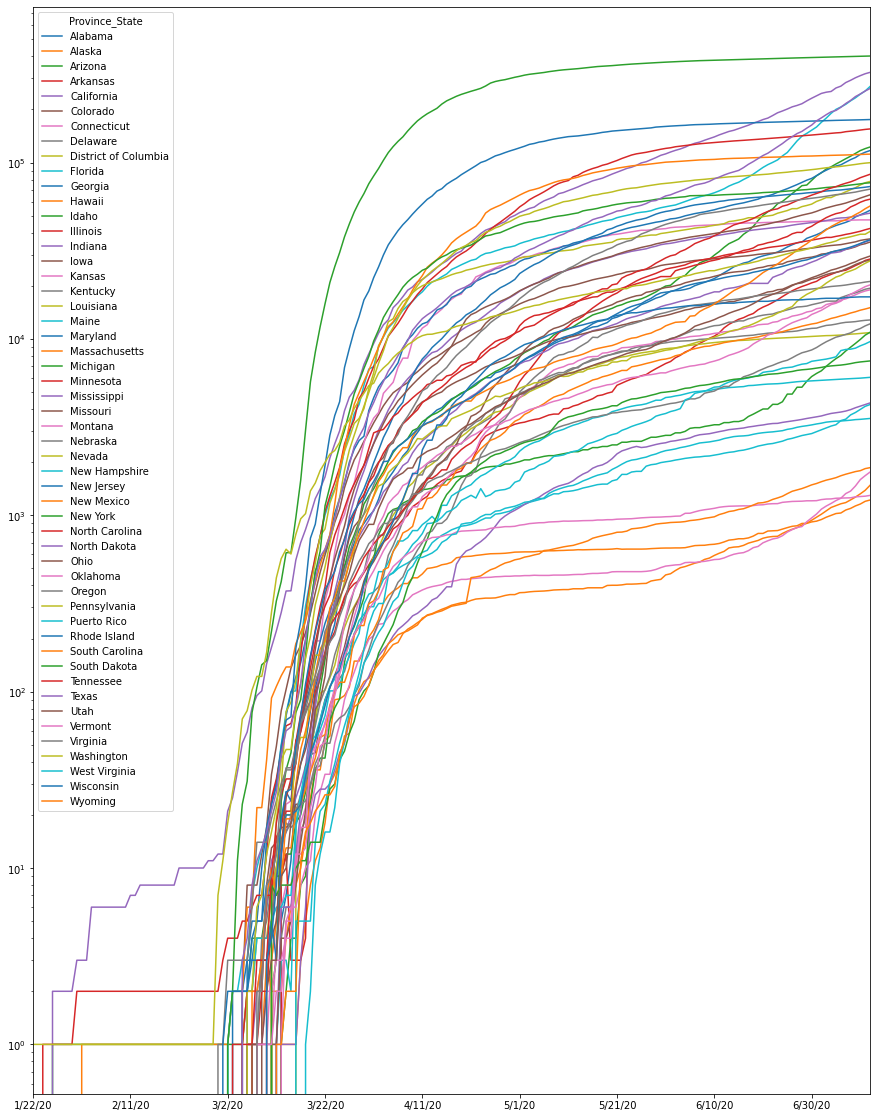

In [10]:
plt.rcParams['figure.figsize'] = [15,20]
Aggregate_cases.plot(kind="line")
plt.yscale("log")
plt.show()


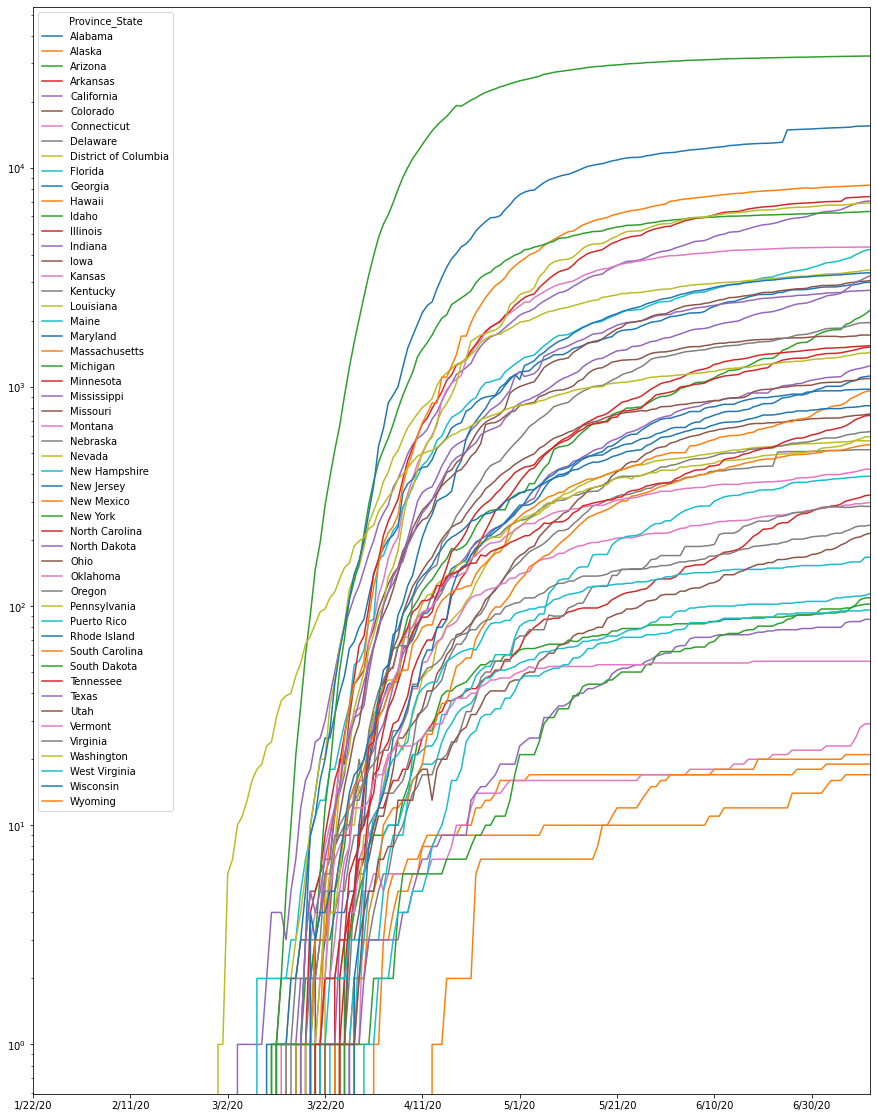

In [11]:
Aggregate_deaths.plot(kind="line")
plt.yscale("log")
plt.show()


## Start all data from a common number of cases or deaths

Create a dictionary of the number days until a specific number of cases and/or deaths was observed.

In [12]:
case_days = 10
death_days = 1

days_until_nth_case = Aggregate_cases[Aggregate_cases < case_days].count().to_dict()
days_until_nth_death = Aggregate_deaths[Aggregate_deaths < death_days].count().to_dict()

Shifted_cases = pd.DataFrame()
for col in Aggregate_cases.columns:
    Shifted_cases[col] = Aggregate_cases[col].shift(-days_until_nth_case[col])

Shifted_deaths = pd.DataFrame()
for col in Aggregate_deaths.columns:
    Shifted_deaths[col] = Aggregate_deaths[col].shift(-days_until_nth_death[col])

In [13]:
Shifted_cases

Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
1/22/20     11.0    11.0     12.0       4.0        10.0      12.0   
1/23/20     29.0    13.0     12.0      62.0        10.0      17.0   
1/24/20     39.0    18.0     18.0     100.0        10.0      34.0   
1/25/20     51.0    30.0     20.0     122.0        10.0      49.0   
1/26/20     78.0    34.0     27.0     165.0        10.0      78.0   
...          ...     ...      ...       ...         ...       ...   
7/8/20       NaN     NaN      NaN       NaN         NaN       NaN   
7/9/20       NaN     NaN      NaN       NaN         NaN       NaN   
7/10/20      NaN     NaN      NaN       NaN         NaN       NaN   
7/11/20      NaN     NaN      NaN       NaN         NaN       NaN   
7/12/20      NaN     NaN      NaN       NaN         NaN       NaN   

         Connecticut  Delaware  District of Columbia  Florida  ...  \
1/22/20         11.0      16.0                  22.0     10.0  ...   
1/23/20         23.0      19.0                  22.0     13.0  ...   
1/24/20         24.0      30.0                  31.0     15.0  ...   
1/25/20         41.0      39.0                  40.0     24.0  ...   
1/26/20         68.0      45.0                  71.0     30.0  ...   
...              ...       ...                   ...      ...  ...   
7/8/20           NaN       NaN                   NaN      NaN  ...   
7/9/20           NaN       NaN                   NaN      NaN  ...   
7/10/20          NaN       NaN                   NaN      NaN  ...   
7/11/20          NaN       NaN                   NaN      NaN  ...   
7/12/20          NaN       NaN                   NaN      NaN  ...   

         South Dakota  Tennessee  Texas  Utah  Vermont  Virginia  Washington  \
1/22/20          10.0       18.0   11.0  10.0     12.0      12.0        11.0   
1/23/20          11.0       26.0   13.0  18.0     12.0      27.0        18.0   
1/24/20          11.0       32.0   16.0  28.0     13.0      37.0        27.0   
1/25/20          14.0       32.0   21.0  39.0     22.0      37.0        39.0   
1/26/20          14.0       52.0   27.0  47.0     29.0      49.0        70.0   
...               ...        ...    ...   ...      ...       ...         ...   
7/8/20            NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/9/20            NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/10/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/11/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/12/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   

         West Virginia  Wisconsin  Wyoming  
1/22/20           12.0       19.0     11.0  
1/23/20           16.0       27.0     16.0  
1/24/20           16.0       28.0     18.0  
1/25/20           22.0       48.0     21.0  
1/26/20           39.0       73.0     23.0  
...                ...        ...      ...  
7/8/20             NaN        NaN      NaN  
7/9/20             NaN        NaN      NaN  
7/10/20            NaN        NaN      NaN  
7/11/20            NaN        NaN      NaN  
7/12/20            NaN        NaN      NaN  

[173 rows x 52 columns]

In [14]:
Shifted_deaths

Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
1/22/20      1.0     1.0      1.0       2.0         1.0       1.0   
1/23/20      1.0     1.0      2.0       2.0         1.0       2.0   
1/24/20      4.0     1.0      2.0       2.0         1.0       2.0   
1/25/20      4.0     2.0      5.0       3.0         1.0       2.0   
1/26/20     10.0     2.0      6.0       5.0         1.0       2.0   
...          ...     ...      ...       ...         ...       ...   
7/8/20       NaN     NaN      NaN       NaN         NaN       NaN   
7/9/20       NaN     NaN      NaN       NaN         NaN       NaN   
7/10/20      NaN     NaN      NaN       NaN         NaN       NaN   
7/11/20      NaN     NaN      NaN       NaN         NaN       NaN   
7/12/20      NaN     NaN      NaN       NaN         NaN       NaN   

         Connecticut  Delaware  District of Columbia  Florida  ...  \
1/22/20          1.0       1.0                   0.0      2.0  ...   
1/23/20          3.0       2.0                   2.0      2.0  ...   
1/24/20          4.0       5.0                   2.0      2.0  ...   
1/25/20          4.0       6.0                   2.0      2.0  ...   
1/26/20          8.0       6.0                   2.0      2.0  ...   
...              ...       ...                   ...      ...  ...   
7/8/20           NaN       NaN                   NaN      NaN  ...   
7/9/20           NaN       NaN                   NaN      NaN  ...   
7/10/20          NaN       NaN                   NaN      NaN  ...   
7/11/20          NaN       NaN                   NaN      NaN  ...   
7/12/20          NaN       NaN                   NaN      NaN  ...   

         South Dakota  Tennessee  Texas  Utah  Vermont  Virginia  Washington  \
1/22/20           1.0        1.0    1.0   1.0      2.0       1.0         1.0   
1/23/20           1.0        1.0    3.0   1.0      2.0       1.0         1.0   
1/24/20           1.0        2.0    5.0   1.0      2.0       2.0         6.0   
1/25/20           1.0        2.0    4.0   1.0      2.0       2.0         7.0   
1/26/20           1.0        2.0    5.0   1.0      5.0       2.0        10.0   
...               ...        ...    ...   ...      ...       ...         ...   
7/8/20            NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/9/20            NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/10/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/11/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/12/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   

         West Virginia  Wisconsin  Wyoming  
1/22/20            1.0        4.0      1.0  
1/23/20            1.0        3.0      1.0  
1/24/20            1.0        4.0      1.0  
1/25/20            2.0        4.0      2.0  
1/26/20            2.0        5.0      2.0  
...                ...        ...      ...  
7/8/20             NaN        NaN      NaN  
7/9/20             NaN        NaN      NaN  
7/10/20            NaN        NaN      NaN  
7/11/20            NaN        NaN      NaN  
7/12/20            NaN        NaN      NaN  

[173 rows x 52 columns]

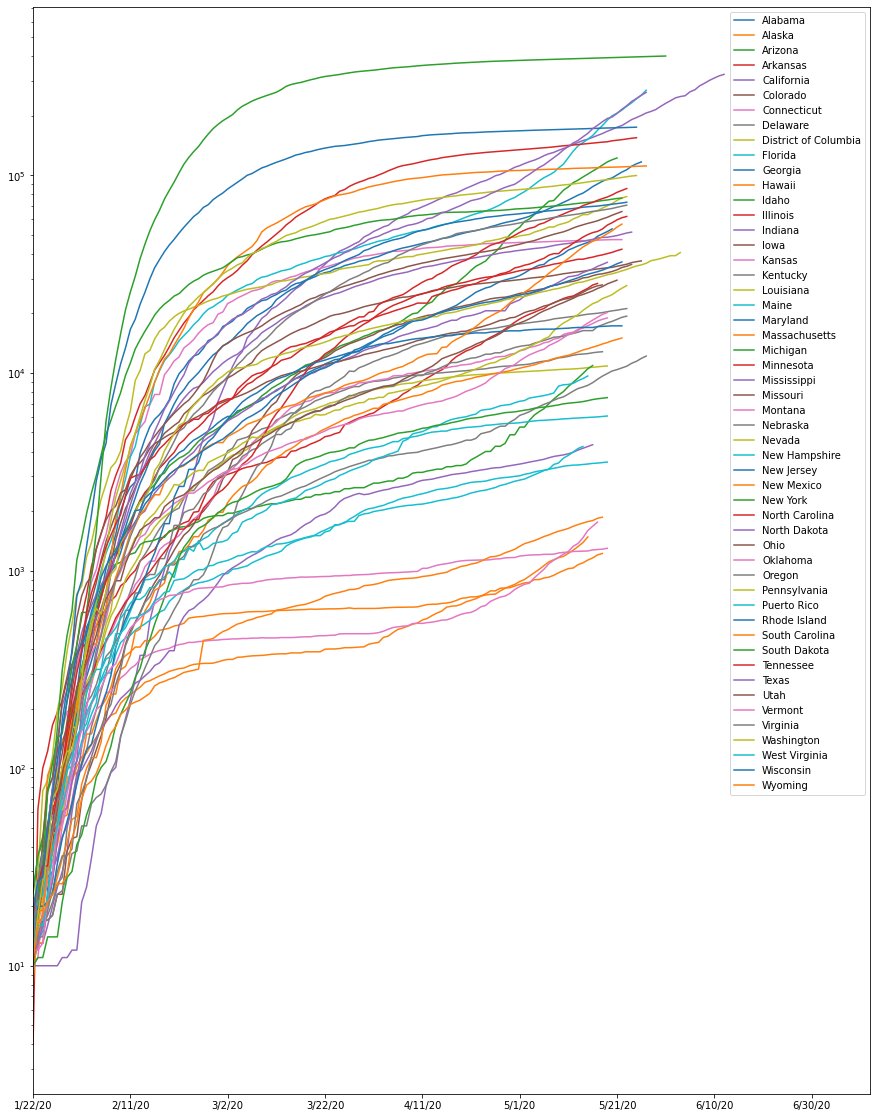

In [15]:
Shifted_cases.plot(kind="line")
plt.yscale("log")
plt.show()

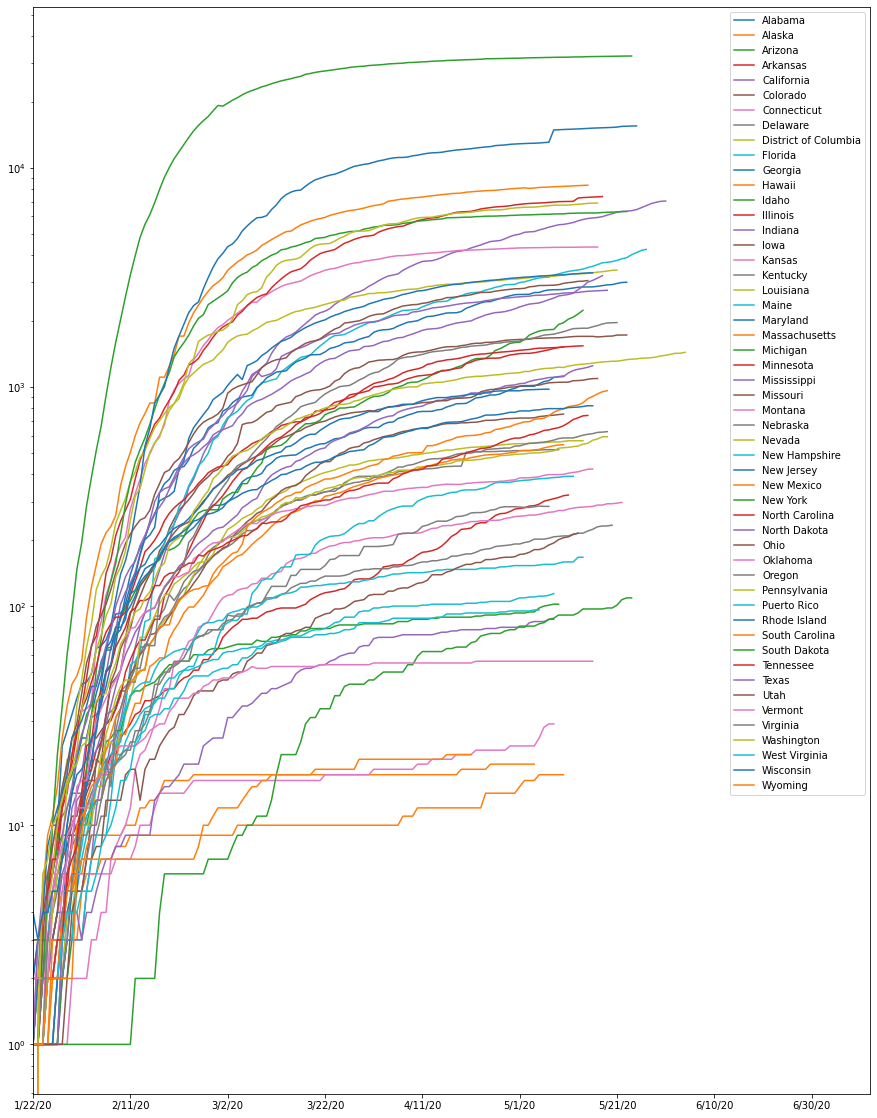

In [16]:
Shifted_deaths.plot(kind="line")
plt.yscale("log")
plt.show()

## Create moving averages

Create a moving average of the shifted data.

In [17]:
#Create-moving-averages
moving_days = 7

Moving_cases = pd.DataFrame()
for col in Shifted_cases.columns:
    Moving_cases[col] = Shifted_cases.rolling(window=moving_days)[col].mean()
    
Moving_deaths = pd.DataFrame()
for col in Shifted_deaths.columns:
    Moving_deaths[col] = Shifted_deaths.rolling(window=moving_days)[col].mean()

In [18]:
Moving_cases

Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
1/22/20      NaN     NaN      NaN       NaN         NaN       NaN   
1/23/20      NaN     NaN      NaN       NaN         NaN       NaN   
1/24/20      NaN     NaN      NaN       NaN         NaN       NaN   
1/25/20      NaN     NaN      NaN       NaN         NaN       NaN   
1/26/20      NaN     NaN      NaN       NaN         NaN       NaN   
...          ...     ...      ...       ...         ...       ...   
7/8/20       NaN     NaN      NaN       NaN         NaN       NaN   
7/9/20       NaN     NaN      NaN       NaN         NaN       NaN   
7/10/20      NaN     NaN      NaN       NaN         NaN       NaN   
7/11/20      NaN     NaN      NaN       NaN         NaN       NaN   
7/12/20      NaN     NaN      NaN       NaN         NaN       NaN   

         Connecticut  Delaware  District of Columbia  Florida  ...  \
1/22/20          NaN       NaN                   NaN      NaN  ...   
1/23/20          NaN       NaN                   NaN      NaN  ...   
1/24/20          NaN       NaN                   NaN      NaN  ...   
1/25/20          NaN       NaN                   NaN      NaN  ...   
1/26/20          NaN       NaN                   NaN      NaN  ...   
...              ...       ...                   ...      ...  ...   
7/8/20           NaN       NaN                   NaN      NaN  ...   
7/9/20           NaN       NaN                   NaN      NaN  ...   
7/10/20          NaN       NaN                   NaN      NaN  ...   
7/11/20          NaN       NaN                   NaN      NaN  ...   
7/12/20          NaN       NaN                   NaN      NaN  ...   

         South Dakota  Tennessee  Texas  Utah  Vermont  Virginia  Washington  \
1/22/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
1/23/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
1/24/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
1/25/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
1/26/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
...               ...        ...    ...   ...      ...       ...         ...   
7/8/20            NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/9/20            NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/10/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/11/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/12/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   

         West Virginia  Wisconsin  Wyoming  
1/22/20            NaN        NaN      NaN  
1/23/20            NaN        NaN      NaN  
1/24/20            NaN        NaN      NaN  
1/25/20            NaN        NaN      NaN  
1/26/20            NaN        NaN      NaN  
...                ...        ...      ...  
7/8/20             NaN        NaN      NaN  
7/9/20             NaN        NaN      NaN  
7/10/20            NaN        NaN      NaN  
7/11/20            NaN        NaN      NaN  
7/12/20            NaN        NaN      NaN  

[173 rows x 52 columns]

In [19]:
Moving_deaths

Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
1/22/20      NaN     NaN      NaN       NaN         NaN       NaN   
1/23/20      NaN     NaN      NaN       NaN         NaN       NaN   
1/24/20      NaN     NaN      NaN       NaN         NaN       NaN   
1/25/20      NaN     NaN      NaN       NaN         NaN       NaN   
1/26/20      NaN     NaN      NaN       NaN         NaN       NaN   
...          ...     ...      ...       ...         ...       ...   
7/8/20       NaN     NaN      NaN       NaN         NaN       NaN   
7/9/20       NaN     NaN      NaN       NaN         NaN       NaN   
7/10/20      NaN     NaN      NaN       NaN         NaN       NaN   
7/11/20      NaN     NaN      NaN       NaN         NaN       NaN   
7/12/20      NaN     NaN      NaN       NaN         NaN       NaN   

         Connecticut  Delaware  District of Columbia  Florida  ...  \
1/22/20          NaN       NaN                   NaN      NaN  ...   
1/23/20          NaN       NaN                   NaN      NaN  ...   
1/24/20          NaN       NaN                   NaN      NaN  ...   
1/25/20          NaN       NaN                   NaN      NaN  ...   
1/26/20          NaN       NaN                   NaN      NaN  ...   
...              ...       ...                   ...      ...  ...   
7/8/20           NaN       NaN                   NaN      NaN  ...   
7/9/20           NaN       NaN                   NaN      NaN  ...   
7/10/20          NaN       NaN                   NaN      NaN  ...   
7/11/20          NaN       NaN                   NaN      NaN  ...   
7/12/20          NaN       NaN                   NaN      NaN  ...   

         South Dakota  Tennessee  Texas  Utah  Vermont  Virginia  Washington  \
1/22/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
1/23/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
1/24/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
1/25/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
1/26/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
...               ...        ...    ...   ...      ...       ...         ...   
7/8/20            NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/9/20            NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/10/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/11/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   
7/12/20           NaN        NaN    NaN   NaN      NaN       NaN         NaN   

         West Virginia  Wisconsin  Wyoming  
1/22/20            NaN        NaN      NaN  
1/23/20            NaN        NaN      NaN  
1/24/20            NaN        NaN      NaN  
1/25/20            NaN        NaN      NaN  
1/26/20            NaN        NaN      NaN  
...                ...        ...      ...  
7/8/20             NaN        NaN      NaN  
7/9/20             NaN        NaN      NaN  
7/10/20            NaN        NaN      NaN  
7/11/20            NaN        NaN      NaN  
7/12/20            NaN        NaN      NaN  

[173 rows x 52 columns]

Plot the moving average.

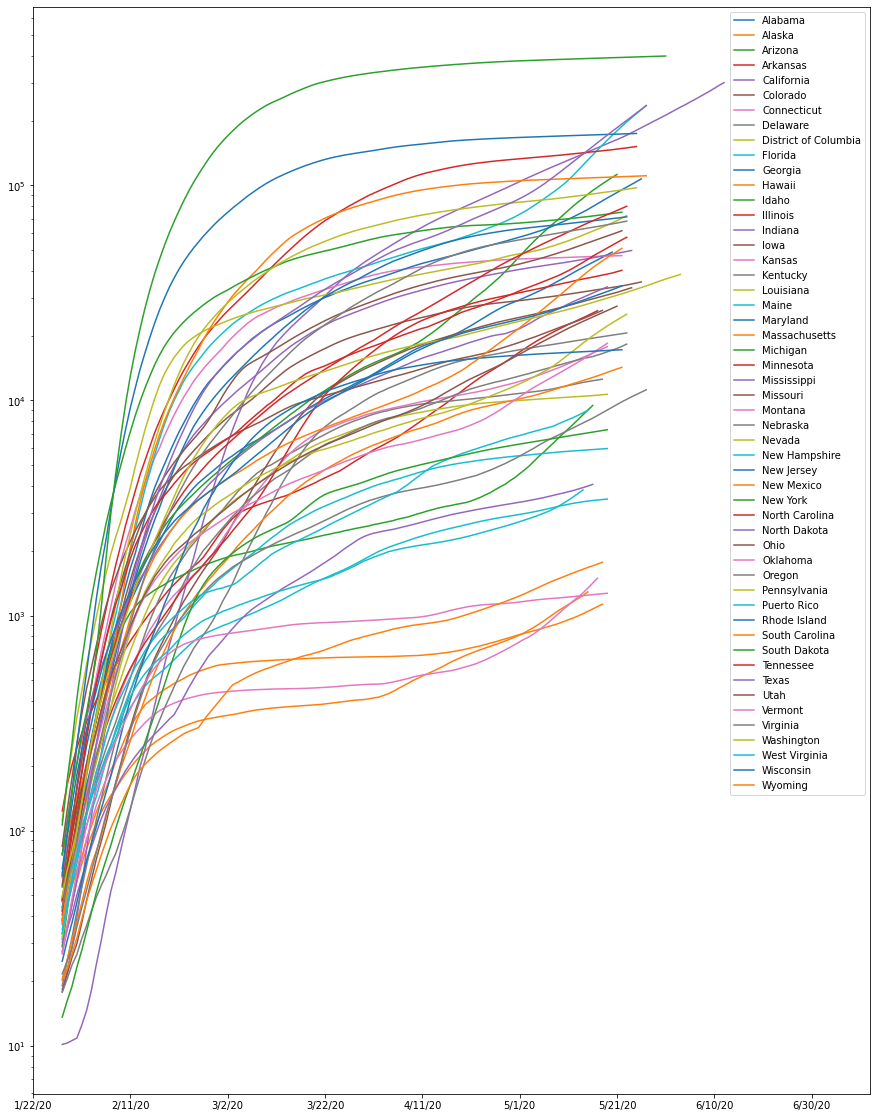

In [20]:
Moving_cases.plot(kind="line")
plt.yscale("log")
plt.show()


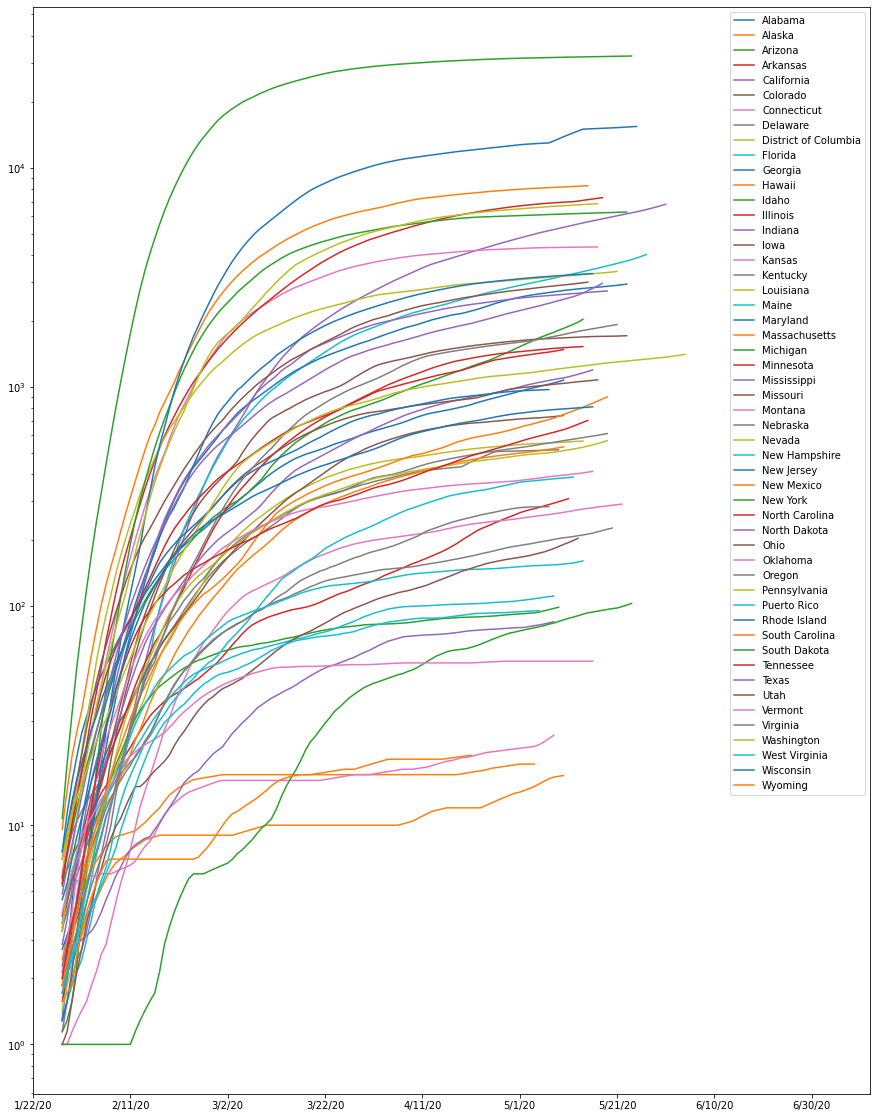

In [21]:
Moving_deaths.plot(kind="line")
plt.yscale("log")
plt.show()


Create a moving average of the aggregate data.

In [22]:
Moving_aggregate_cases = pd.DataFrame()
for col in Aggregate_cases.columns:
    Moving_aggregate_cases[col] = Aggregate_cases.rolling(window=moving_days)[col].mean()
    
Moving_aggregate_deaths = pd.DataFrame()
for col in Aggregate_deaths.columns:
    Moving_aggregate_deaths[col] = Aggregate_deaths.rolling(window=moving_days)[col].mean()

In [23]:
Moving_aggregate_cases

Alabama       Alaska        Arizona      Arkansas  \
1/22/20           NaN          NaN            NaN           NaN   
1/23/20           NaN          NaN            NaN           NaN   
1/24/20           NaN          NaN            NaN           NaN   
1/25/20           NaN          NaN            NaN           NaN   
1/26/20           NaN          NaN            NaN           NaN   
...               ...          ...            ...           ...   
7/8/20   43773.714286  1125.571429   98164.285714  23675.857143   
7/9/20   45068.428571  1161.857143  101768.000000  24244.000000   
7/10/20  46303.142857  1199.428571  105342.285714  24841.285714   
7/11/20  47601.000000  1239.142857  108965.571429  25506.285714   
7/12/20  48977.285714  1288.428571  112446.142857  26156.714286   

            California      Colorado   Connecticut      Delaware  \
1/22/20            NaN           NaN           NaN           NaN   
1/23/20            NaN           NaN           NaN           NaN   
1/24/20            NaN           NaN           NaN           NaN   
1/25/20            NaN           NaN           NaN           NaN   
1/26/20            NaN           NaN           NaN           NaN   
...                ...           ...           ...           ...   
7/8/20   266035.285714  34116.142857  46844.857143  12135.285714   
7/9/20   274025.857143  34426.428571  46925.285714  12249.571429   
7/10/20  282650.285714  34794.714286  47006.714286  12353.714286   
7/11/20  292059.714286  35183.857143  47088.142857  12460.428571   
7/12/20  300611.428571  35590.571429  47169.571429  12557.000000   

         District of Columbia        Florida  ...  South Dakota     Tennessee  \
1/22/20                   NaN            NaN  ...           NaN           NaN   
1/23/20                   NaN            NaN  ...           NaN           NaN   
1/24/20                   NaN            NaN  ...           NaN           NaN   
1/25/20                   NaN            NaN  ...           NaN           NaN   
1/26/20                   NaN            NaN  ...           NaN           NaN   
...                       ...            ...  ...           ...           ...   
7/8/20           10497.142857  197412.428571  ...   7067.428571  51228.142857   
7/9/20           10538.428571  206499.857143  ...   7130.714286  52756.857143   
7/10/20          10582.428571  215865.142857  ...   7191.142857  54304.571429   
7/11/20          10633.000000  225073.571429  ...   7252.000000  55856.857143   
7/12/20          10685.142857  235030.714286  ...   7314.285714  57377.428571   

                 Texas          Utah      Vermont      Virginia    Washington  \
1/22/20            NaN           NaN          NaN           NaN           NaN   
1/23/20            NaN           NaN          NaN           NaN           NaN   
1/24/20            NaN           NaN          NaN           NaN           NaN   
1/25/20            NaN           NaN          NaN           NaN           NaN   
1/26/20            NaN           NaN          NaN           NaN           NaN   
...                ...           ...          ...           ...           ...   
7/8/20   200558.857143  24983.857143  1244.428571  65600.285714  36060.000000   
7/9/20   208759.428571  25567.571429  1250.857143  66207.857143  36692.857143   
7/10/20  217039.000000  26190.000000  1256.714286  66856.142857  37327.142857   
7/11/20  225675.714286  26806.142857  1263.142857  67523.714286  37894.428571   
7/12/20  235010.142857  27453.571429  1269.857143  68226.857143  38574.142857   

         West Virginia     Wisconsin      Wyoming  
1/22/20            NaN           NaN          NaN  
1/23/20            NaN           NaN          NaN  
1/24/20            NaN           NaN          NaN  
1/25/20            NaN           NaN          NaN  
1/26/20            NaN           NaN          NaN  
...                ...           ...          ...  
7/8/20     3328.571429  31494.000000  1642.285714  
7/9/20     3439.000000  32089.

In [24]:
Moving_aggregate_deaths

Alabama     Alaska      Arizona    Arkansas   California  \
1/22/20          NaN        NaN          NaN         NaN          NaN   
1/23/20          NaN        NaN          NaN         NaN          NaN   
1/24/20          NaN        NaN          NaN         NaN          NaN   
1/25/20          NaN        NaN          NaN         NaN          NaN   
1/26/20          NaN        NaN          NaN         NaN          NaN   
...              ...        ...          ...         ...          ...   
7/8/20   1014.714286  15.857143  1846.142857  290.142857  6431.285714   
7/9/20   1026.571429  16.285714  1885.285714  294.428571  6516.142857   
7/10/20  1040.571429  16.571429  1925.857143  299.000000  6607.571429   
7/11/20  1055.857143  16.714286  1973.571429  303.714286  6706.571429   
7/12/20  1072.142857  16.857143  2032.428571  308.571429  6803.428571   

            Colorado  Connecticut    Delaware  District of Columbia  \
1/22/20          NaN          NaN         NaN                   NaN   
1/23/20          NaN          NaN         NaN                   NaN   
1/24/20          NaN          NaN         NaN                   NaN   
1/25/20          NaN          NaN         NaN                   NaN   
1/26/20          NaN          NaN         NaN                   NaN   
...              ...          ...         ...                   ...   
7/8/20   1699.285714  4335.714286  512.428571            558.714286   
7/9/20   1700.000000  4338.857143  513.428571            560.714286   
7/10/20  1703.285714  4340.714286  514.142857            562.571429   
7/11/20  1706.714286  4342.571429  514.857143            564.142857   
7/12/20  1710.142857  4344.428571  515.571429            565.428571   

             Florida  ...  South Dakota   Tennessee        Texas        Utah  \
1/22/20          NaN  ...           NaN         NaN          NaN         NaN   
1/23/20          NaN  ...           NaN         NaN          NaN         NaN   
1/24/20          NaN  ...           NaN         NaN          NaN         NaN   
1/25/20          NaN  ...           NaN         NaN          NaN         NaN   
1/26/20          NaN  ...           NaN         NaN          NaN         NaN   
...              ...  ...           ...         ...          ...         ...   
7/8/20   3748.857143  ...     97.285714  648.142857  2676.142857  186.714286   
7/9/20   3804.857143  ...     97.857143  661.000000  2742.428571  190.857143   
7/10/20  3864.571429  ...     99.285714  673.857143  2808.428571  194.571429   
7/11/20  3935.285714  ...    101.000000  688.285714  2882.428571  199.000000   
7/12/20  4008.285714  ...    102.714286  702.000000  2964.571429  203.428571   

         Vermont     Virginia   Washington  West Virginia   Wisconsin  \
1/22/20      NaN          NaN          NaN            NaN         NaN   
1/23/20      NaN          NaN          NaN            NaN         NaN   
1/24/20      NaN          NaN          NaN            NaN         NaN   
1/25/20      NaN          NaN          NaN            NaN         NaN   
1/26/20      NaN          NaN          NaN            NaN         NaN   
...          ...          ...          ...            ...         ...   
7/8/20      56.0  1857.428571  1364.857143      94.142857  798.428571   
7/9/20      56.0  1874.714286  1374.428571      94.428571  800.714286   
7/10/20     56.0  1890.857143  1384.714286      94.714286  803.285714   
7/11/20     56.0  1907.000000  1394.714286      95.000000  806.857143   
7/12/20     56.0  1923.142857  1406.000000      95.285714  810.285714   

           Wyoming  
1/22/20        NaN  
1/23/20        NaN  
1/24/20        NaN  
1/25/20        NaN  
1/26/20        NaN  
...            ...  
7/8/20   20.285714  
7/9/20   20.428571  
7/10/20  20.571429  
7/11/20  20.714286  
7/12/20  20.857143  

[173 rows x 52 columns]

Plot the moving average.

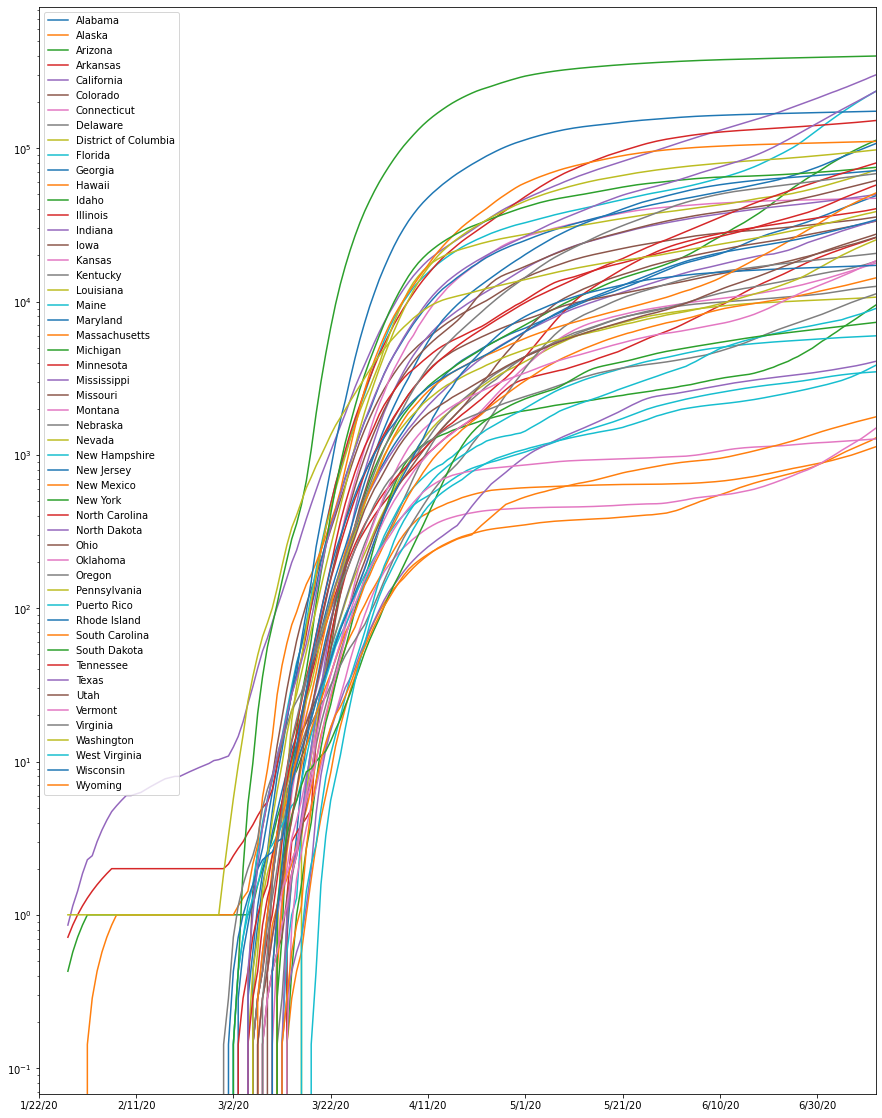

In [25]:
Moving_aggregate_cases.plot(kind="line")
plt.yscale("log")
plt.show()


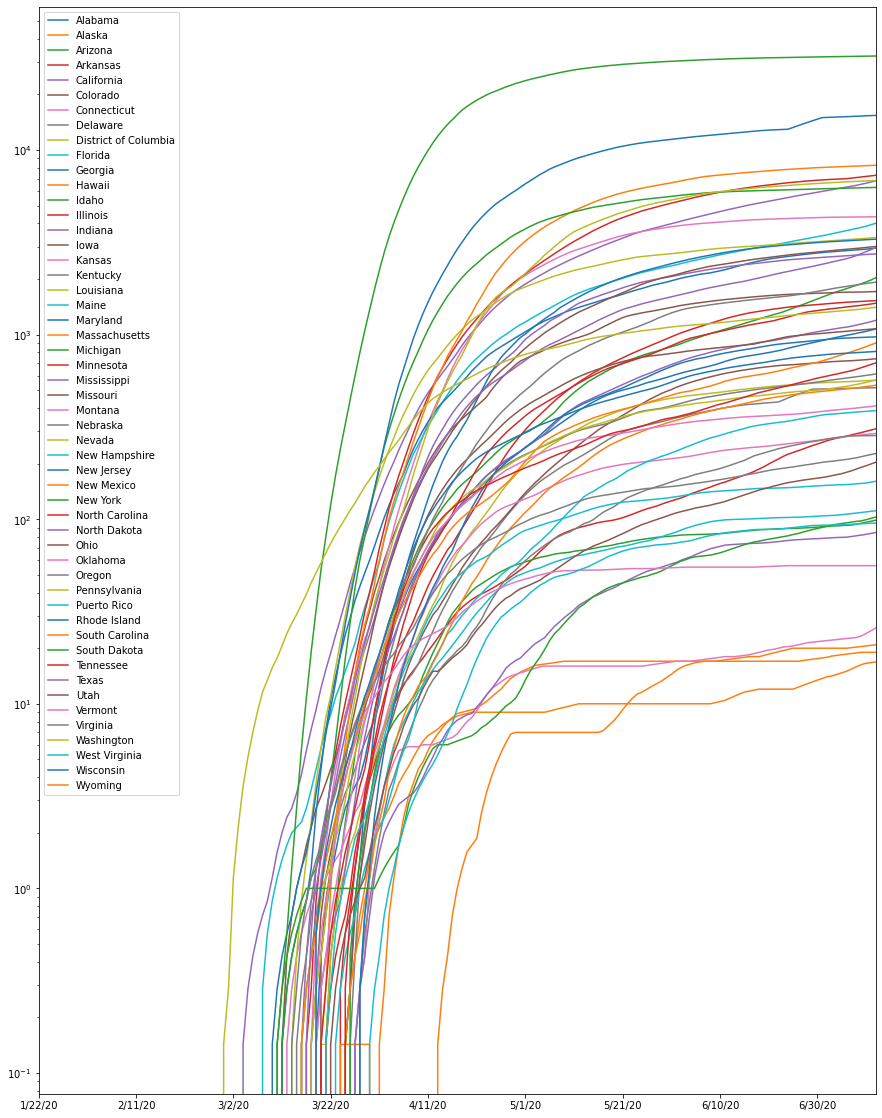

In [26]:
Moving_aggregate_deaths.plot(kind="line")
plt.yscale("log")
plt.show()


## Compare two states cases and deaths

         Florida  Florida  Washington  Washington
1/22/20      NaN      NaN         NaN         NaN
1/23/20      NaN      NaN         NaN         NaN
1/24/20      NaN      NaN         NaN         NaN
1/25/20      NaN      NaN         NaN         NaN
1/26/20      NaN      NaN         NaN         NaN
...          ...      ...         ...         ...
7/8/20       NaN      NaN         NaN         NaN
7/9/20       NaN      NaN         NaN         NaN
7/10/20      NaN      NaN         NaN         NaN
7/11/20      NaN      NaN         NaN         NaN
7/12/20      NaN      NaN         NaN         NaN

[173 rows x 4 columns]


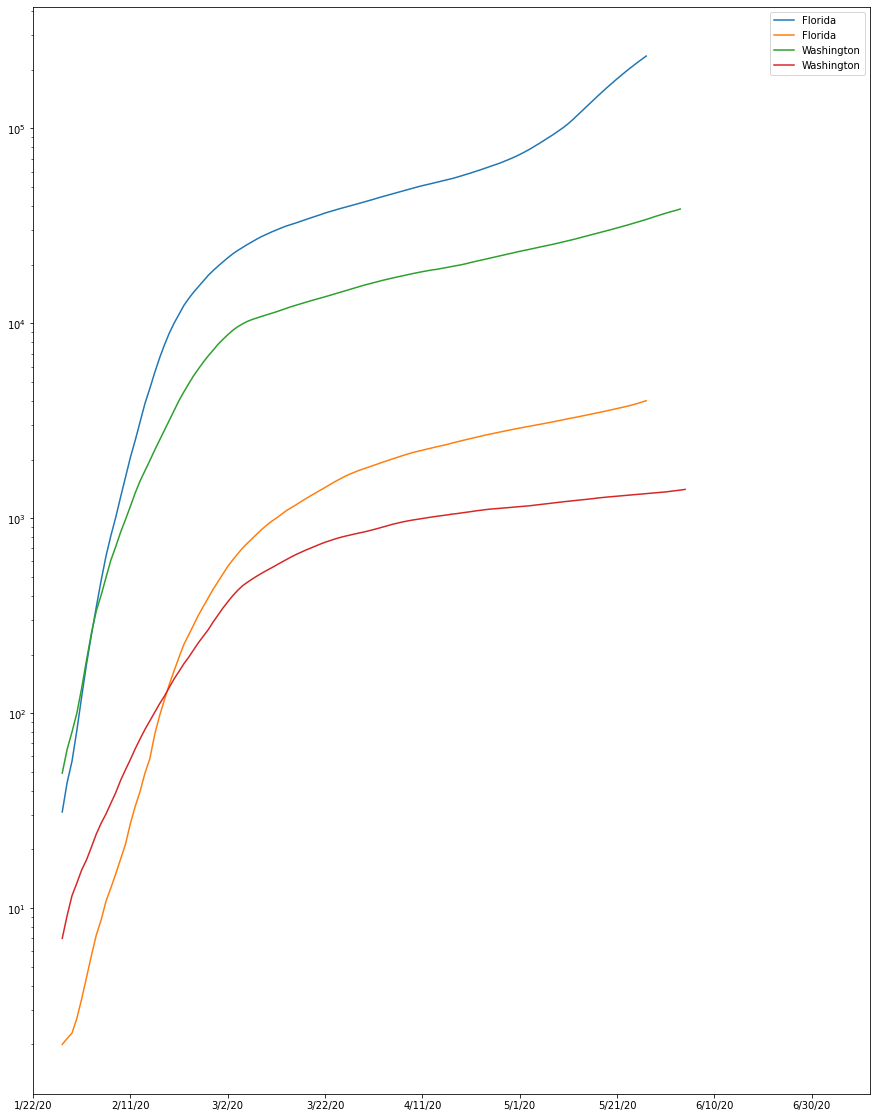

In [27]:
state_1 = 'Florida'
state_2 = 'Washington'

state_data = pd.concat([Moving_cases[state_1],Moving_deaths[state_1],Moving_cases[state_2],Moving_deaths[state_2]], 
                       axis = 1)
print(state_data)
state_data.plot(kind="line")
plt.yscale("log")
plt.show()

## Calculate Daily Growth Rates from moving aggregate data

In [28]:
Growth_rate_cases = Moving_aggregate_cases.pct_change()
Growth_rate_cases

Alabama    Alaska   Arizona  Arkansas  California  Colorado  \
1/22/20       NaN       NaN       NaN       NaN         NaN       NaN   
1/23/20       NaN       NaN       NaN       NaN         NaN       NaN   
1/24/20       NaN       NaN       NaN       NaN         NaN       NaN   
1/25/20       NaN       NaN       NaN       NaN         NaN       NaN   
1/26/20       NaN       NaN       NaN       NaN         NaN       NaN   
...           ...       ...       ...       ...         ...       ...   
7/8/20   0.026808  0.032364  0.036987  0.025043    0.029794  0.008816   
7/9/20   0.029577  0.032238  0.036711  0.023997    0.030036  0.009095   
7/10/20  0.027396  0.032337  0.035122  0.024636    0.031473  0.010698   
7/11/20  0.028030  0.033111  0.034395  0.026770    0.033290  0.011184   
7/12/20  0.028913  0.039774  0.031942  0.025501    0.029281  0.011560   

         Connecticut  Delaware  District of Columbia   Florida  ...  \
1/22/20          NaN       NaN                   NaN       NaN  ...   
1/23/20          NaN       NaN                   NaN       NaN  ...   
1/24/20          NaN       NaN                   NaN       NaN  ...   
1/25/20          NaN       NaN                   NaN       NaN  ...   
1/26/20          NaN       NaN                   NaN       NaN  ...   
...              ...       ...                   ...       ...  ...   
7/8/20      0.001637  0.011334              0.003784  0.049188  ...   
7/9/20      0.001717  0.009418              0.003933  0.046033  ...   
7/10/20     0.001735  0.008502              0.004175  0.045353  ...   
7/11/20     0.001732  0.008638              0.004779  0.042658  ...   
7/12/20     0.001729  0.007750              0.004904  0.044240  ...   

         South Dakota  Tennessee     Texas      Utah   Vermont  Virginia  \
1/22/20           NaN        NaN       NaN       NaN       NaN       NaN   
1/23/20           NaN        NaN       NaN       NaN       NaN       NaN   
1/24/20           NaN        NaN       NaN       NaN       NaN       NaN   
1/25/20           NaN        NaN       NaN       NaN       NaN       NaN   
1/26/20           NaN        NaN       NaN       NaN       NaN       NaN   
...               ...        ...       ...       ...       ...       ...   
7/8/20       0.008480   0.030670  0.038895  0.023641  0.005309  0.009169   
7/9/20       0.008955   0.029841  0.040889  0.023364  0.005166  0.009262   
7/10/20      0.008474   0.029337  0.039661  0.024344  0.004683  0.009792   
7/11/20      0.008463   0.028585  0.039793  0.023526  0.005115  0.009985   
7/12/20      0.008589   0.027223  0.041362  0.024152  0.005316  0.010413   

         Washington  West Virginia  Wisconsin   Wyoming  
1/22/20         NaN            NaN        NaN       NaN  
1/23/20         NaN            NaN        NaN       NaN  
1/24/20         NaN            NaN        NaN       NaN  
1/25/20         NaN            NaN        NaN       NaN  
1/26/20         NaN            NaN        NaN       NaN  
...             ...            ...        ...       ...  
7/8/20     0.018176       0.032252   0.018268  0.020053  
7/9/20     0.017550       0.033176   0.018915  0.019050  
7/10/20    0.017286       0.035600   0.019748  0.017755  
7/11/20    0.015198       0.037746   0.020186  0.019542  
7/12/20    0.017937       0.037958   0.020844  0.018756  

[173 rows x 52 columns]

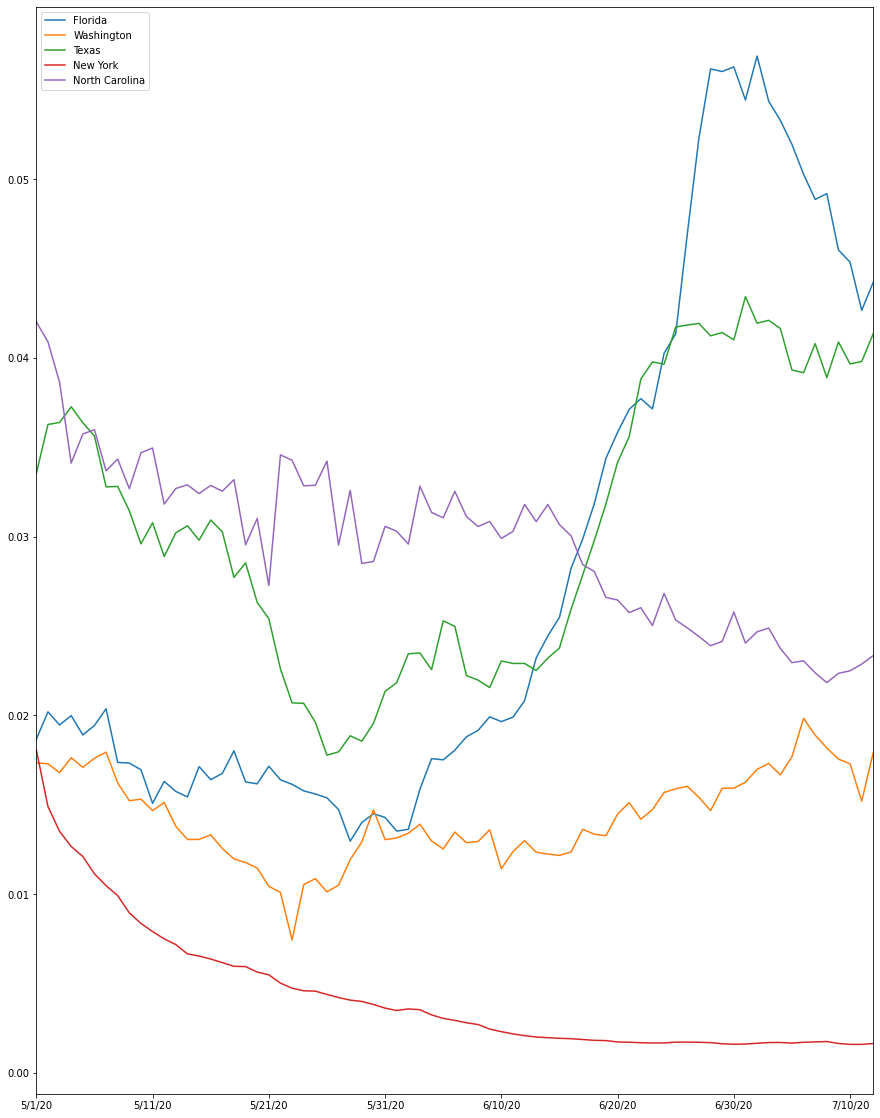

In [29]:
Growth_rate_cases[['Florida','Washington', 'Texas', 'New York','North Carolina']].iloc[100:].plot(kind = "line")
plt.show()

## Daily Cases

In [30]:
Daily_cases = Aggregate_cases.diff()
Daily_cases

Province_State  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
1/22/20             NaN     NaN      NaN       NaN         NaN       NaN   
1/23/20             0.0     0.0      0.0       0.0         0.0       0.0   
1/24/20             0.0     0.0      0.0       0.0         0.0       0.0   
1/25/20             0.0     0.0      0.0       0.0         0.0       0.0   
1/26/20             0.0     0.0      1.0       0.0         2.0       0.0   
...                 ...     ...      ...       ...         ...       ...   
7/8/20           1177.0    42.0   3520.0     734.0      8548.0     452.0   
7/9/20           2212.0    46.0   4057.0     806.0      9924.0     408.0   
7/10/20          1334.0    55.0   4221.0     751.0      8401.0     666.0   
7/11/20          1439.0    62.0   3038.0    1061.0      7876.0     400.0   
7/12/20          1640.0    94.0   2537.0     503.0      5782.0     322.0   

Province_State  Connecticut  Delaware  District of Columbia  Florida  ...  \
1/22/20                 NaN       NaN                   NaN      NaN  ...   
1/23/20                 0.0       0.0                   0.0      0.0  ...   
1/24/20                 0.0       0.0                   0.0      0.0  ...   
1/25/20                 0.0       0.0                   0.0      0.0  ...   
1/26/20                 0.0       0.0                   0.0      0.0  ...   
...                     ...       ...                   ...      ...  ...   
7/8/20                 75.0      48.0                  73.0   9989.0  ...   
7/9/20                101.0      69.0                  37.0   8935.0  ...   
7/10/20                78.0     121.0                  64.0  11433.0  ...   
7/11/20                 0.0      91.0                  58.0  10360.0  ...   
7/12/20                 0.0      61.0                  46.0  15300.0  ...   

Province_State  South Dakota  Tennessee    Texas   Utah  Vermont  Virginia  \
1/22/20                  NaN        NaN      NaN    NaN      NaN       NaN   
1/23/20                  0.0        0.0      0.0    0.0      0.0       0.0   
1/24/20                  0.0        0.0      0.0    0.0      0.0       0.0   
1/25/20                  0.0        0.0      0.0    0.0      0.0       0.0   
1/26/20                  0.0        0.0      0.0    0.0      0.0       0.0   
...                      ...        ...      ...    ...      ...       ...   
7/8/20                  79.0     2472.0   8903.0  722.0      2.0     635.0   
7/9/20                  94.0     1605.0  11612.0  601.0     16.0     613.0   
7/10/20                 65.0     1955.0   8215.0  867.0      5.0     943.0   
7/11/20                 53.0     1460.0   9659.0  632.0      6.0     851.0   
7/12/20                 45.0      954.0   8347.0  629.0     13.0     888.0   

Province_State  Washington  West Virginia  Wisconsin  Wyoming  
1/22/20                NaN            NaN        NaN      NaN  
1/23/20                0.0            0.0        0.0      0.0  
1/24/20                0.0            0.0        0.0      0.0  
1/25/20                0.0            0.0        0.0      0.0  
1/26/20                0.0            0.0        0.0      0.0  
...                    ...            ...        ...      ...  
7/8/20               521.0          202.0      598.0     31.0  
7/9/20               640.0          119.0      754.0     29.0  
7/10/20              637.0          157.0      845.0     21.0  
7/11/20                0.0          163.0      926.0     49.0  
7/12/20             1438.0           98.0      769.0     23.0  

[173 rows x 52 columns]

In [31]:
moving_days = 7
Moving_daily_cases = pd.DataFrame()
for col in Daily_cases.columns:
    Moving_daily_cases[col] = Daily_cases.rolling(window=moving_days)[col].mean()
    Moving_daily_cases[col] = Moving_daily_cases.rolling(window=moving_days)[col].mean()
    Moving_daily_cases[col] = Moving_daily_cases.rolling(window=moving_days)[col].mean()
Moving_daily_cases

Alabama     Alaska      Arizona    Arkansas   California  \
1/22/20          NaN        NaN          NaN         NaN          NaN   
1/23/20          NaN        NaN          NaN         NaN          NaN   
1/24/20          NaN        NaN          NaN         NaN          NaN   
1/25/20          NaN        NaN          NaN         NaN          NaN   
1/26/20          NaN        NaN          NaN         NaN          NaN   
...              ...        ...          ...         ...          ...   
7/8/20   1018.892128  28.778426  3345.766764  570.577259  6173.912536   
7/9/20   1056.419825  30.772595  3422.734694  567.346939  6377.075802   
7/10/20  1089.457726  32.539359  3483.209913  565.650146  6606.516035   
7/11/20  1119.758017  33.944606  3533.405248  566.941691  6885.253644   
7/12/20  1144.314869  35.247813  3575.807580  570.618076  7159.046647   

           Colorado  Connecticut    Delaware  District of Columbia  \
1/22/20         NaN          NaN         NaN                   NaN   
1/23/20         NaN          NaN         NaN                   NaN   
1/24/20         NaN          NaN         NaN                   NaN   
1/25/20         NaN          NaN         NaN                   NaN   
1/26/20         NaN          NaN         NaN                   NaN   
...             ...          ...         ...                   ...   
7/8/20   260.288630    83.428571  105.169096             33.650146   
7/9/20   263.064140    82.752187  112.457726             33.994169   
7/10/20  267.460641    81.364431  117.772595             34.457726   
7/11/20  273.930029    80.090379  121.183673             35.282799   
7/12/20  283.597668    79.661808  122.620991             36.472303   

             Florida  ...  South Dakota    Tennessee        Texas        Utah  \
1/22/20          NaN  ...           NaN          NaN          NaN         NaN   
1/23/20          NaN  ...           NaN          NaN          NaN         NaN   
1/24/20          NaN  ...           NaN          NaN          NaN         NaN   
1/25/20          NaN  ...           NaN          NaN          NaN         NaN   
1/26/20          NaN  ...           NaN          NaN          NaN         NaN   
...              ...  ...           ...          ...          ...         ...   
7/8/20   7527.790087  ...     57.909621  1211.364431  6318.527697  548.396501   
7/9/20   7837.326531  ...     58.172012  1282.472303  6544.962099  551.317784   
7/10/20  8110.422741  ...     58.183673  1346.947522  6769.892128  555.259475   
7/11/20  8349.096210  ...     58.262391  1401.673469  6996.693878  559.332362   
7/12/20  8574.393586  ...     58.504373  1437.233236  7246.851312  564.763848   

          Vermont    Virginia  Washington  West Virginia   Wisconsin  \
1/22/20       NaN         NaN         NaN            NaN         NaN   
1/23/20       NaN         NaN         NaN            NaN         NaN   
1/24/20       NaN         NaN         NaN            NaN         NaN   
1/25/20       NaN         NaN         NaN            NaN         NaN   
1/26/20       NaN         NaN         NaN            NaN         NaN   
...           ...         ...         ...            ...         ...   
7/8/20   5.743440  545.895044  538.381924      55.425656  495.658892   
7/9/20   5.749271  550.763848  557.332362      60.504373  512.186589   
7/10/20  5.810496  557.583090  575.839650      66.536443  528.390671   
7/11/20  5.935860  566.597668  592.784257      73.667638  544.107872   
7/12/20  6.049563  577.478134  608.381924      82.026239  560.195335   

           Wyoming  
1/22/20        NaN  
1/23/20        NaN  
1/24/20        NaN  
1/25/20        NaN  
1/26/20        NaN  
...            ...  
7/8/20   31.641399  
7/9/20   31.641399  
7/10/20  31.568513  
7/11/20  31.548105  
7/12/20  31.568513  

[173 rows x 52 columns]

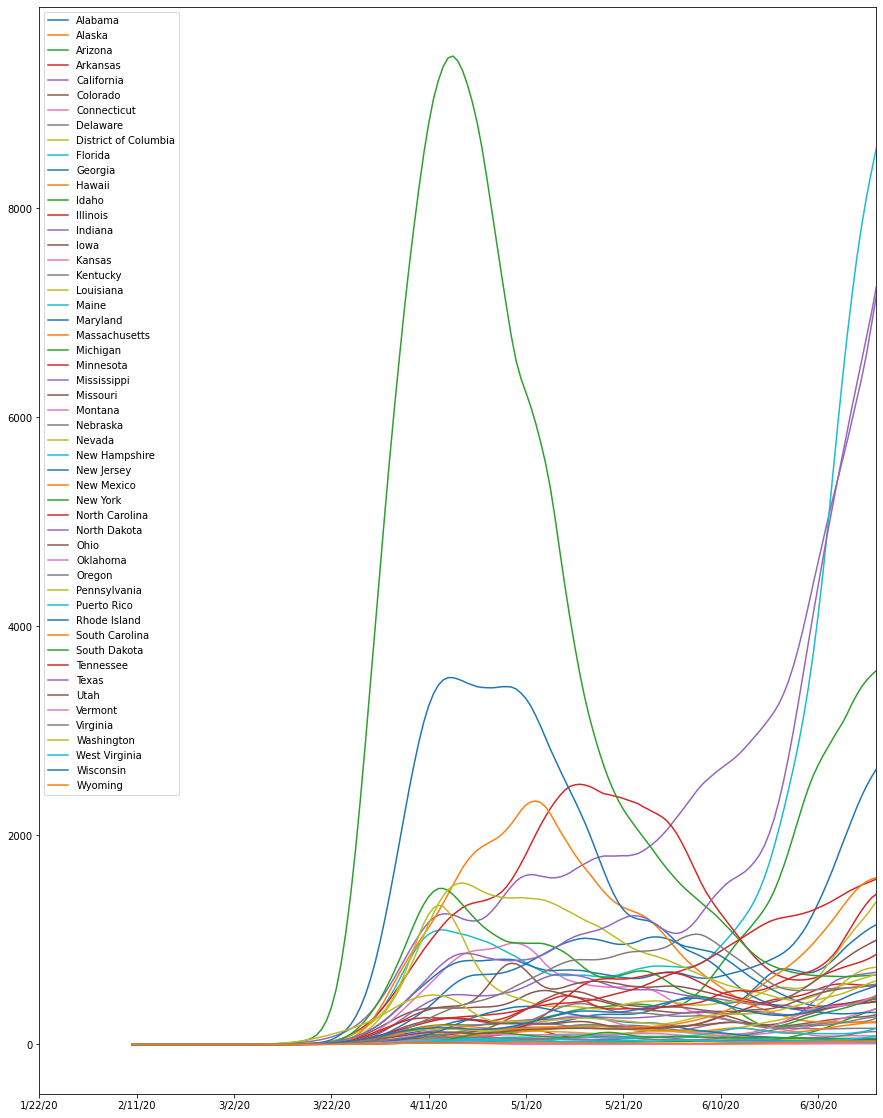

In [32]:
Moving_daily_cases.plot(kind="line")
plt.show()

In [33]:
Moving_daily_cases
type(Moving_daily_cases.index)

pandas.core.indexes.base.Index

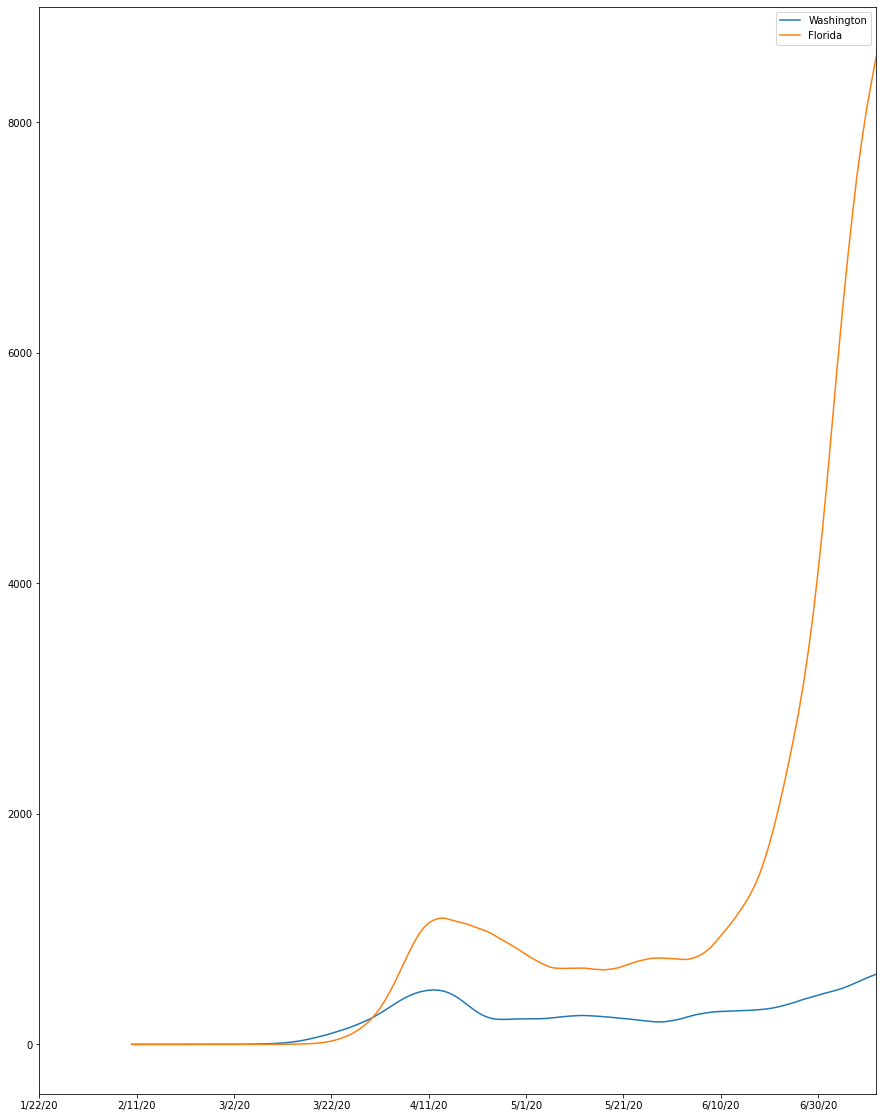

In [37]:
state_1 = 'Washington'
state_2 = 'Florida'



state_data = pd.concat([Moving_daily_cases[state_1],Moving_daily_cases[state_2]], 
                       axis = 1)
state_data.plot(kind="line")
plt.show()